**Exploratory Data Analysis**

First we start by loading the dataset and the necesaary libaries

In [220]:
# Loading necesarry libaries
import pandas as pd
from datetime import datetime as dt

In [221]:
# Loading the dataset
df = pd.read_csv("flight_data.csv")

# Assign today's date to all rows in the 'Search Date' column
df['Search Date'] = datetime.today().strftime('%Y-%m-%d')

In [222]:
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2950 entries, 0 to 2949
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Airline             2950 non-null   object
 1   Flight Number       2950 non-null   int64 
 2   Source City         2950 non-null   object
 3   Departure Time      2950 non-null   object
 4   Number of Stops     2950 non-null   int64 
 5   Arrival Time        2950 non-null   object
 6   Destination City    2950 non-null   object
 7   Duration (Minutes)  2950 non-null   int64 
 8   Price               2950 non-null   object
 9   Search Date         2950 non-null   object
dtypes: int64(3), object(7)
memory usage: 230.6+ KB


,Airline,Flight Number,Source City,Departure Time,Number of Stops,Arrival Time,Destination City,Duration (Minutes),Price,Search Date
0,Norse Atlantic Airways (UK),712,Los Angeles,2024-04-25T16:30:00,0,2024-04-26T10:55:00,London,625,$244,2024-04-25
1,Virgin Atlantic,142,Los Angeles,2024-04-25T19:10:00,0,2024-04-26T13:30:00,London,620,$793,2024-04-25
2,Virgin Atlantic,8,Los Angeles,2024-04-25T15:55:00,0,2024-04-26T10:15:00,London,620,$793,2024-04-25
3,Delta,5925,Los Angeles,2024-04-25T19:10:00,0,2024-04-26T13:30:00,London,620,$793,2024-04-25
4,Delta,5978,Los Angeles,2024-04-25T15:55:00,0,2024-04-26T10:15:00,London,620,$793,2024-04-25


In [223]:
# Convert columns to datetime
df['Departure Time'] = pd.to_datetime(df['Departure Time']).dt.strftime('%Y-%m-%d %H:%M:%S')
df['Arrival Time'] = pd.to_datetime(df['Arrival Time']).dt.strftime('%Y-%m-%d %H:%M:%S')
df['Departure Time'] = pd.to_datetime(df['Departure Time']).dt.floor('S')
df['Arrival Time'] = pd.to_datetime(df['Arrival Time']).dt.floor('S')


# Convert Number of Stops to categorical
df['Source City'] = df['Source City'].astype('category')
df['Destination City'] = df['Destination City'].astype('category')
df['Airline'] = df['Airline'].astype('category')
df['Flight Number'] = df['Flight Number'].astype('category')
df['Number of Stops'] = df['Number of Stops'].astype('category')

# Price conversion: remove the dollar sign and convert to float
df['Price'] = df['Price'].str.replace('$', '').str.replace(',','').astype(float)
df['Number of Stops'] = df['Number of Stops'].astype(int)

# Check the new dtypes
print(df.dtypes)


Airline                     category
Flight Number               category
Source City                 category
Departure Time        datetime64[ns]
Number of Stops                int64
Arrival Time          datetime64[ns]
Destination City            category
Duration (Minutes)             int64
Price                        float64
Search Date                   object
dtype: object


/var/folders/yk/c34vj_zs38gcc2_lmpzdbdn40000gn/T/ipykernel_3000/415269400.py:4: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['Departure Time'] = pd.to_datetime(df['Departure Time']).dt.floor('S')
/var/folders/yk/c34vj_zs38gcc2_lmpzdbdn40000gn/T/ipykernel_3000/415269400.py:5: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['Arrival Time'] = pd.to_datetime(df['Arrival Time']).dt.floor('S')


To simplify further analysis we extract the date and time from "Departure Time" and "Arrival" and create 4 new seperate columns. 

In [224]:
df['Departure Date'] = df['Departure Time'].dt.strftime('%Y-%m-%d')
df['Arrival Date'] = df['Arrival Time'].dt.strftime('%Y-%m-%d')

# Create new columns with just the time
df['Departure Time Only'] = df['Departure Time'].dt.strftime('%H:%M:%S')
df['Arrival Time Only'] = df['Arrival Time'].dt.strftime('%H:%M:%S')


# Assume 'df' is your existing DataFrame and 'Column1' and 'Column2' are the names of the columns you want to remove
df = df.drop(['Departure Time', 'Arrival Time', 'Flight Number'], axis=1)


In [225]:
df_test = pd.read_csv("flight_data.csv")

In [226]:
import pandas as pd

# Assuming 'df' is your dataframe
# Step 1: Convert the time-only strings to datetime.time objects
df['Departure Time Only'] = pd.to_datetime(df['Departure Time Only'], format='%H:%M:%S').dt.time
df['Arrival Time Only'] = pd.to_datetime(df['Arrival Time Only'], format='%H:%M:%S').dt.time

# Step 2: Define the categorization function based on the intervals
def categorize_time(time):
    if time >= pd.to_datetime("00:00").time() and time < pd.to_datetime("04:00").time():
        return 'Night'
    elif time >= pd.to_datetime("04:00").time() and time < pd.to_datetime("08:00").time():
        return 'Early Morning'
    elif time >= pd.to_datetime("08:00").time() and time < pd.to_datetime("12:00").time():
        return 'Morning'
    elif time >= pd.to_datetime("12:00").time() and time < pd.to_datetime("18:00").time():
        return 'Afternoon'
    elif time >= pd.to_datetime("18:00").time() and time < pd.to_datetime("00:00").time():
        return 'Evening'
    else:  # Handle the edge case for midnight
        return 'Evening'

# Step 3: Apply the function to create new categorical columns
df['Departure Time Only'] = df['Departure Time Only'].apply(categorize_time)
df['Arrival Time Only'] = df['Arrival Time Only'].apply(categorize_time)

# Convert the new columns to categorical type
df['Departure Time Only'] = df['Departure Time Only'].astype('category')
df['Arrival Time Only'] = df['Arrival Time Only'].astype('category')

# Preview the DataFrame
df.head()


,Airline,Source City,Number of Stops,Destination City,Duration (Minutes),Price,Search Date,Departure Date,Arrival Date,Departure Time Only,Arrival Time Only
0,Norse Atlantic Airways (UK),Los Angeles,0,London,625,244.0,2024-04-25,2024-04-25,2024-04-26,Afternoon,Morning
1,Virgin Atlantic,Los Angeles,0,London,620,793.0,2024-04-25,2024-04-25,2024-04-26,Evening,Afternoon
2,Virgin Atlantic,Los Angeles,0,London,620,793.0,2024-04-25,2024-04-25,2024-04-26,Afternoon,Morning
3,Delta,Los Angeles,0,London,620,793.0,2024-04-25,2024-04-25,2024-04-26,Evening,Afternoon
4,Delta,Los Angeles,0,London,620,793.0,2024-04-25,2024-04-25,2024-04-26,Afternoon,Morning


In [227]:
# Convert it to date time
df['Search Date'] = pd.to_datetime(df['Search Date'])
df['Departure Date'] = pd.to_datetime(df['Departure Date'])
df['Arrival Date'] = pd.to_datetime(df['Arrival Date'])
df['Number of Stops'] = df['Number of Stops'].astype('category')

# Calculate the difference in days
df['Days Until Departure'] = (df['Departure Date'] - df['Search Date']).dt.days

# Preview the DataFrame
df.head()

,Airline,Source City,Number of Stops,Destination City,Duration (Minutes),Price,Search Date,Departure Date,Arrival Date,Departure Time Only,Arrival Time Only,Days Until Departure
0,Norse Atlantic Airways (UK),Los Angeles,0,London,625,244.0,2024-04-25,2024-04-25,2024-04-26,Afternoon,Morning,0
1,Virgin Atlantic,Los Angeles,0,London,620,793.0,2024-04-25,2024-04-25,2024-04-26,Evening,Afternoon,0
2,Virgin Atlantic,Los Angeles,0,London,620,793.0,2024-04-25,2024-04-25,2024-04-26,Afternoon,Morning,0
3,Delta,Los Angeles,0,London,620,793.0,2024-04-25,2024-04-25,2024-04-26,Evening,Afternoon,0
4,Delta,Los Angeles,0,London,620,793.0,2024-04-25,2024-04-25,2024-04-26,Afternoon,Morning,0


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2950 entries, 0 to 2949
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Airline               2950 non-null   category      
 1   Source City           2950 non-null   category      
 2   Number of Stops       2950 non-null   category      
 3   Destination City      2950 non-null   category      
 4   Duration (Minutes)    2950 non-null   int64         
 5   Price                 2950 non-null   float64       
 6   Search Date           2950 non-null   datetime64[ns]
 7   Departure Date        2950 non-null   datetime64[ns]
 8   Arrival Date          2950 non-null   datetime64[ns]
 9   Departure Time Only   2950 non-null   category      
 10  Arrival Time Only     2950 non-null   category      
 11  Days Until Departure  2950 non-null   int64         
dtypes: category(6), datetime64[ns](3), float64(1), int64(2)
memory usage: 157.8 

**Exploratory Data Analysis**

*Numeric variables*

In [229]:
df.describe()

,Duration (Minutes),Price,Search Date,Departure Date,Arrival Date,Days Until Departure
count,2950.000000,2950.000000,2950,2950,2950,2950.000000
mean,656.180678,615.972203,2024-04-25 00:00:00,2024-09-21 09:12:34.169491456,2024-09-22 09:15:29.898305024,149.383729
min,615.000000,196.000000,2024-04-25 00:00:00,2024-04-25 00:00:00,2024-04-26 00:00:00,0.000000
25%,620.000000,488.000000,2024-04-25 00:00:00,2024-07-08 00:00:00,2024-07-09 00:00:00,74.000000
50%,625.000000,588.000000,2024-04-25 00:00:00,2024-09-20 00:00:00,2024-09-21 00:00:00,148.000000
75%,635.000000,658.000000,2024-04-25 00:00:00,2024-12-06 00:00:00,2024-12-07 00:00:00,225.000000
max,2115.000000,16838.000000,2024-04-25 00:00:00,2025-02-18 00:00:00,2025-02-19 00:00:00,299.000000
std,103.879725,348.620520,NaN,NaN,NaN,86.730469


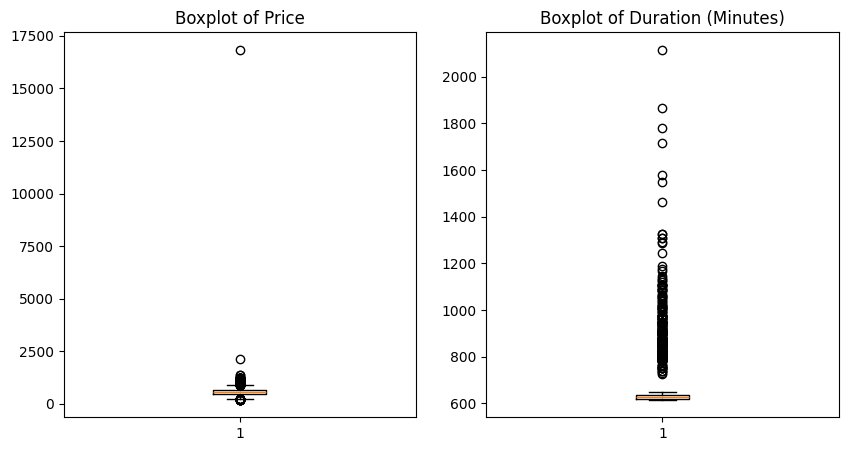

In [230]:
import matplotlib.pyplot as plt # pip install matplotlib

# Create boxplots to visualize outliers in numerical variables
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].boxplot(df["Price"])
axs[0].set_title("Boxplot of Price")
axs[1].boxplot(df["Duration (Minutes)"])
axs[1].set_title("Boxplot of Duration (Minutes)")
plt.show()

In [231]:
# Calculate z-scores to identify outliers in numerical variables
from scipy import stats
z_scores_price = stats.zscore(df["Price"])
z_scores_duration = stats.zscore(df["Duration (Minutes)"])
threshold = 3
outliers_price = df["Price"][abs(z_scores_price) > threshold]
outliers_duration = df["Duration (Minutes)"][abs(z_scores_duration) > threshold]
print("Outliers in Price:", outliers_price)
print("Outliers in Duration:", outliers_duration)

Outliers in Price: 2154     2127.0
2155    16838.0
Name: Price, dtype: float64
Outliers in Duration: 285     1780
290      980
305      980
306     1093
308     1050
        ... 
2447    1005
2448    1085
2467    1105
2468    1100
2478    1085
Name: Duration (Minutes), Length: 65, dtype: int64


In [232]:
# Filter the dataframe to remove outliers in price
df_filtered_price = df[abs(z_scores_price) <= threshold]

# Filter the dataframe to remove outliers in duration
df_filtered_duration = df[abs(z_scores_duration) <= threshold]

# If you want to remove outliers for both variables at the same time
df_filtered = df[(abs(z_scores_price) <= threshold) & (abs(z_scores_duration) <= threshold)]


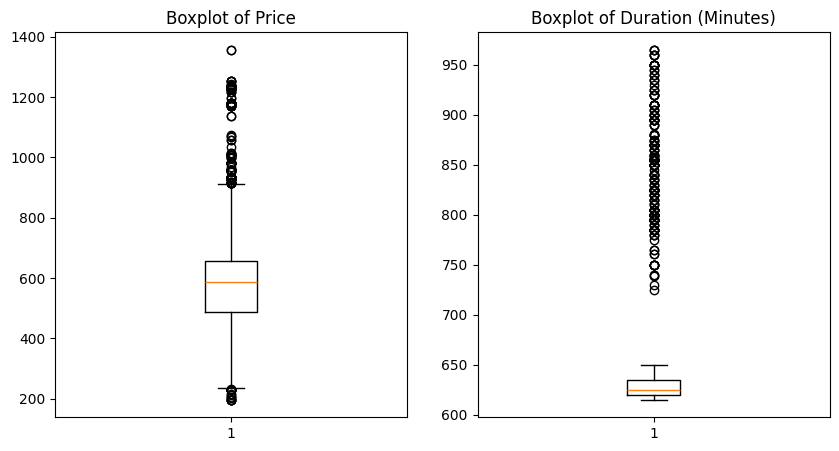

In [233]:
import matplotlib.pyplot as plt # pip install matplotlib

# Create boxplots to visualize outliers in numerical variables
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].boxplot(df_filtered["Price"])
axs[0].set_title("Boxplot of Price")
axs[1].boxplot(df_filtered["Duration (Minutes)"])
axs[1].set_title("Boxplot of Duration (Minutes)")
plt.show()

In [234]:
df_filtered['Number of Stops'].value_counts()

Number of Stops
0    2629
1     256
2       0
3       0
Name: count, dtype: int64

In [235]:
outliers_duration

285     1780
290      980
305      980
306     1093
308     1050
        ... 
2447    1005
2448    1085
2467    1105
2468    1100
2478    1085
Name: Duration (Minutes), Length: 65, dtype: int64

In [236]:
df_filtered.describe()

,Duration (Minutes),Price,Search Date,Departure Date,Arrival Date,Days Until Departure
count,2885.000000,2885.000000,2885,2885,2885,2885.000000
mean,644.997227,610.741768,2024-04-24 23:59:59.999999744,2024-09-21 17:55:08.006932224,2024-09-22 17:55:08.006932480,149.746620
min,615.000000,196.000000,2024-04-25 00:00:00,2024-04-25 00:00:00,2024-04-26 00:00:00,0.000000
25%,620.000000,488.000000,2024-04-25 00:00:00,2024-07-10 00:00:00,2024-07-11 00:00:00,76.000000
50%,625.000000,588.000000,2024-04-25 00:00:00,2024-09-20 00:00:00,2024-09-21 00:00:00,148.000000
75%,635.000000,658.000000,2024-04-25 00:00:00,2024-12-06 00:00:00,2024-12-07 00:00:00,225.000000
max,965.000000,1357.000000,2024-04-25 00:00:00,2025-02-18 00:00:00,2025-02-19 00:00:00,299.000000
std,64.622477,176.869647,NaN,NaN,NaN,86.698818


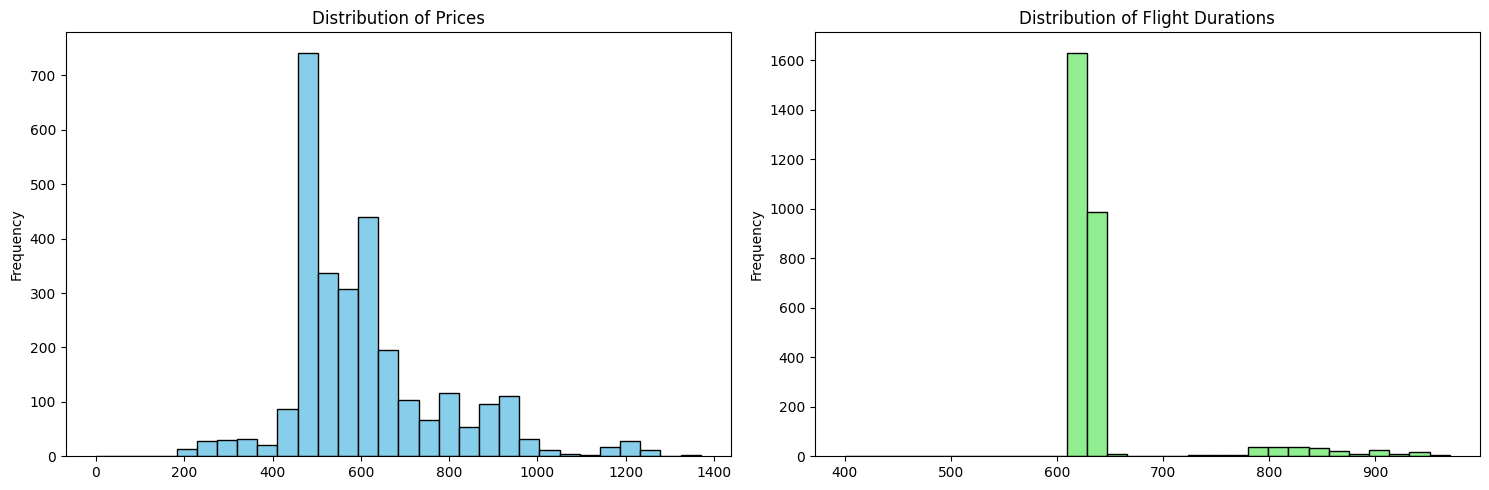

In [237]:
# Plotting numerical features
import matplotlib.pyplot as plt

# Create a figure and axes with 3 subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot histograms for each column
df_filtered['Price'].plot.hist(ax=axes[0], bins=30, range=[0, 1370], color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Prices')

df_filtered['Duration (Minutes)'].plot.hist(ax=axes[1], bins=30, range=[400, 970], color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of Flight Durations')

plt.tight_layout()
plt.show()

Categorical Variables

In [238]:
print("\nDistribution of categorical variables:")
for col in df_filtered.select_dtypes(include='category'):
    print(df_filtered[col].value_counts())


Distribution of categorical variables:
Airline
British Airways                822
Virgin Atlantic                486
Delta                          379
Iberia                         363
Alaska Airlines                142
Norse Atlantic Airways (UK)    128
United                         121
American Airlines              115
Lufthansa                       69
Finnair                         68
Norse Atlantic Airways          53
WestJet                         25
SWISS                           25
jetBlue                         23
French Bee                      21
Aer Lingus                      20
Air France                      11
KLM                              6
Condor                           4
LOT                              1
Air Caraibes                     1
Scandinavian Airlines            1
LEVEL                            1
Spirit Airlines                  0
Turkish Airlines                 0
ITA Airways                      0
Name: count, dtype: int64
Source City
Los 

In [239]:
df_filtered.head()

,Airline,Source City,Number of Stops,Destination City,Duration (Minutes),Price,Search Date,Departure Date,Arrival Date,Departure Time Only,Arrival Time Only,Days Until Departure
0,Norse Atlantic Airways (UK),Los Angeles,0,London,625,244.0,2024-04-25,2024-04-25,2024-04-26,Afternoon,Morning,0
1,Virgin Atlantic,Los Angeles,0,London,620,793.0,2024-04-25,2024-04-25,2024-04-26,Evening,Afternoon,0
2,Virgin Atlantic,Los Angeles,0,London,620,793.0,2024-04-25,2024-04-25,2024-04-26,Afternoon,Morning,0
3,Delta,Los Angeles,0,London,620,793.0,2024-04-25,2024-04-25,2024-04-26,Evening,Afternoon,0
4,Delta,Los Angeles,0,London,620,793.0,2024-04-25,2024-04-25,2024-04-26,Afternoon,Morning,0


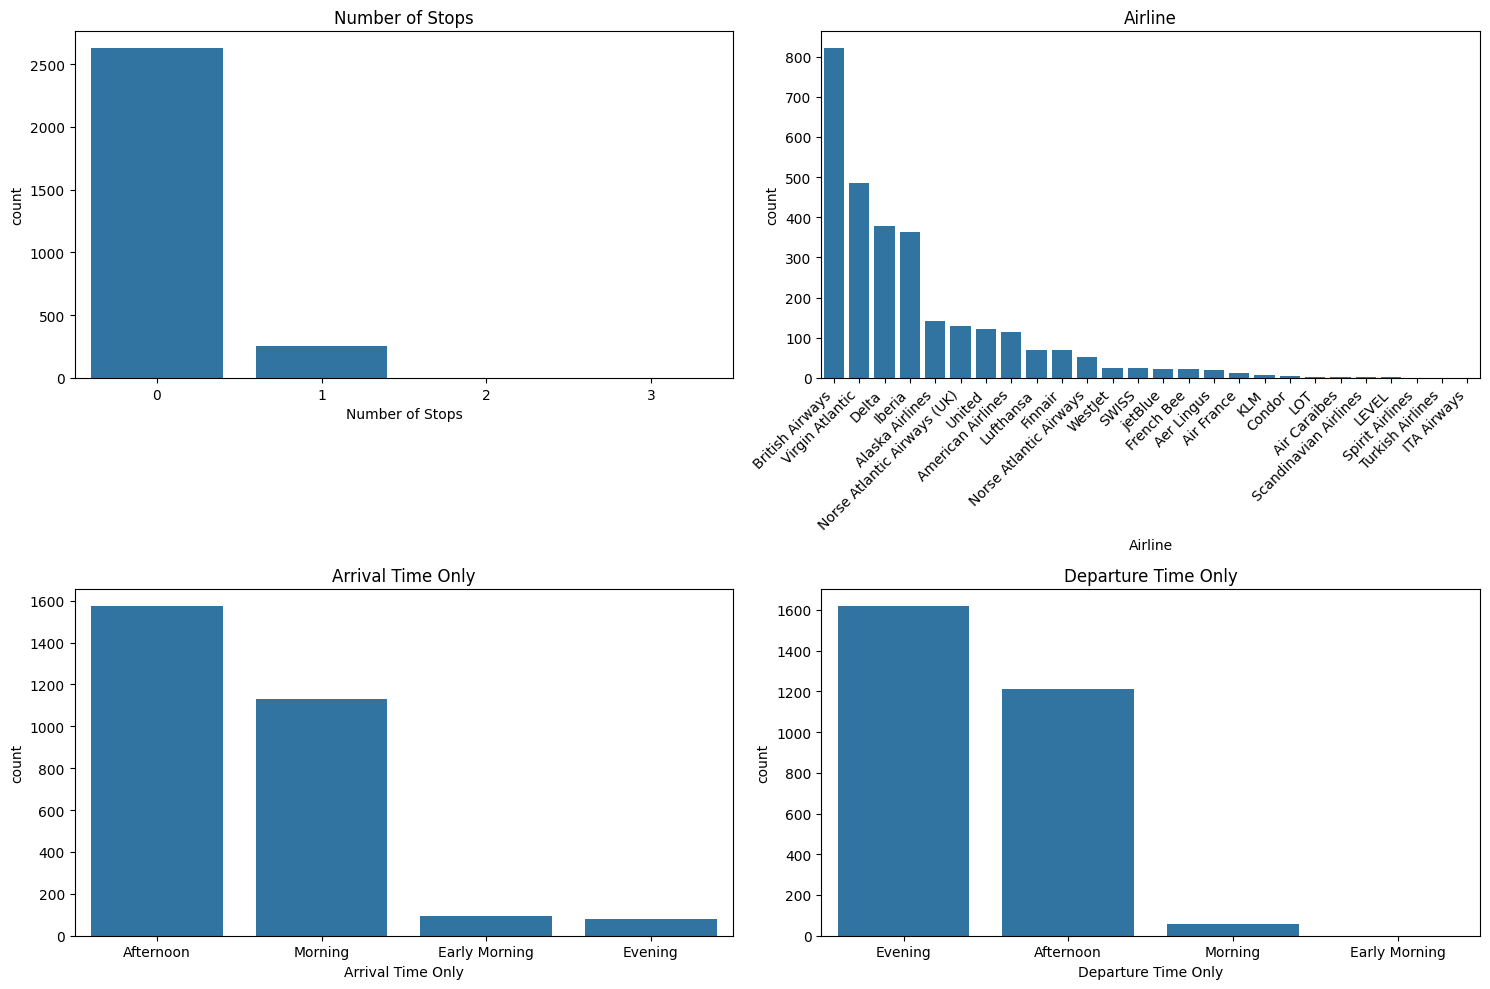

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_filtered' is your DataFrame

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Adjust the figure size as needed

# Calculate value counts and sort them for 'Number of Stops'
stops_counts = df_filtered['Number of Stops'].value_counts().sort_values(ascending=False)
sns.countplot(data=df_filtered, x='Number of Stops', order=stops_counts.index, ax=axes[0, 0])
axes[0, 0].set_title('Number of Stops')

# Calculate value counts and sort them for 'Airline'
airline_counts = df_filtered['Airline'].value_counts().sort_values(ascending=False)
sns.countplot(data=df_filtered, x='Airline', order=airline_counts.index, ax=axes[0, 1])
axes[0, 1].set_title('Airline')

# Rotate x-axis labels for better readability if needed
for label in axes[0, 1].get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

# Calculate value counts and sort them for 'Arrival Time Only'
arrival_time_counts = df_filtered['Arrival Time Only'].value_counts().sort_values(ascending=False)
sns.countplot(data=df_filtered, x='Arrival Time Only', order=arrival_time_counts.index, ax=axes[1, 0])
axes[1, 0].set_title('Arrival Time Only')

# Calculate value counts and sort them for 'Departure Time Only'
departure_time_counts = df_filtered['Departure Time Only'].value_counts().sort_values(ascending=False)
sns.countplot(data=df_filtered, x='Departure Time Only', order=departure_time_counts.index, ax=axes[1, 1])
axes[1, 1].set_title('Departure Time Only')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()


In [241]:
# Calculate the percentage of each category
airline_counts = df_filtered['Airline'].value_counts(normalize=True)

# Find categories with less than 10% of the observations
small_categories = airline_counts[airline_counts < 0.025].index

# Lump small categories into "Other Airlines"
df_filtered['Airline Lumped'] = df_filtered['Airline'].apply(lambda x: "Other Airlines" if x in small_categories else x)

# Check the modified 'Airline' column
df_filtered['Airline Lumped'].value_counts(normalize=True)


/var/folders/yk/c34vj_zs38gcc2_lmpzdbdn40000gn/T/ipykernel_3000/265965360.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Airline Lumped'] = df_filtered['Airline'].apply(lambda x: "Other Airlines" if x in small_categories else x)


Airline Lumped
British Airways                0.284922
Virgin Atlantic                0.168458
Delta                          0.131369
Iberia                         0.125823
Other Airlines                 0.114038
Alaska Airlines                0.049220
Norse Atlantic Airways (UK)    0.044367
United                         0.041941
American Airlines              0.039861
Name: proportion, dtype: float64